In [1]:
import os
import numpy as np
import re
from nltk import sent_tokenize
from matplotlib import pyplot
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

In [2]:


# Obtain filenames and sort them by name

path = '/home/student/ThesisData/IEEE_data_v0.2/'
filenames = []
for filename in os.listdir(path):
    filenames.append(filename)

path2 = '/home/student/ThesisData/Indeed_data_v0.0/'
filenames2 = []
for filename in os.listdir(path2):
    filenames2.append(filename)
    
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)

sort_nicely(filenames)
sort_nicely(filenames2)

In [3]:
len(filenames)

250

In [4]:

# Calculate the amount unique words in the corpus
# Approx: 6987 unique words
def removegarbage(text):
    text=re.sub(r'\W+',' ',text)
    text=text.lower()
    return text

lent = 0
counter =Counter()
for filename in filenames:
    with open(path + filename, 'r') as f:
        words = set(removegarbage(f.read()).split()) 
        counter.update(words)
        f.close()
for filename in filenames2:
    with open(path2 + filename, 'r') as g:
        words = set(removegarbage(g.read()).split())
        counter.update(words)
        g.close()
print(len(counter))

11196


In [172]:
# print(counter)

In [17]:
# test = []
# for filename in filenames:
#     with open(path + filename, 'r') as f:
#         x = f.read().split()
#         test.append(x)
        

# Old type of sentence splitting, made mistakes: Took whole paraghraps as one sentence
# sentdict = dict()
# for i in range(len(filenames)):
#     with open(path + filenames[i], 'r') as f:
#         text = f.read().lower()
#         f.close()
#         sentdict[i] = sent_tokenize(text)
# for j in range(len(filenames2)):
#     with open(path2 + filenames2[j], 'r') as g:
#         text = g.read().lower()
#         g.close()
#         sentdict[j + len(filenames)] = sent_tokenize(text)

        
# Improved sentences, no mistakes will be made
sentdictionary = dict()
for i in range(len(filenames)):
    with open(path + filenames[i], 'r') as f:
        text = f.read().lower()
        f.close()
        sentdictionary[i] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)
for j in range(len(filenames2)):
    with open(path2 + filenames2[j], 'r') as g:
        text = g.read().lower()
        g.close()
        sentdictionary[j + len(filenames)] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)

        

In [18]:
# # Double checking
# cpim = 0
# for i in range(len(test)):
#     for word in range(len(test[i])-1):
#         if test[i][word].lower() == 'science':
#             cpim+=1
            
# print(cpim)

# # Some testing
# z = sentdict[1]
# for sent in range(len(z)):
#     print(z[0])
#     break


In [19]:
len(filenames)

250

In [20]:
# Split files into sentences
# Prepare them for Word2Vec model
sentences = []
for i in range(len(filenames)):
    for sentence in sentdictionary[i]:
        sent = []
        sent.append(sentence)
        sentences.append(sent)
print(len(sentences))
for j in range(len(filenames), len(filenames2)+len(filenames)-1):
    for sentence in sentdictionary[j]:
        sent = []
        sent.append(sentence)
        sentences.append(sent)
print(len(sentences))
        
# Example of one tokenized sentence
tokens = word_tokenize(sentences[2][0])
print(tokens)

realsentences = []
for sentence in sentences:
    tokens = word_tokenize(sentence[0])
    realsentences.append(tokens)

11561
15990
['10', 'hours', '2018-05-082018-06-06']


In [197]:
regex2 = re.compile('[%s]' % re.escape(punct))
tests = sentences[1]
print(tests)
def test_re(s):  # From Vinko's solution, with fix.
    
    return regex2.sub('', s)
print(test_re(tests[0]))

TypeError: 'str' object cannot be interpreted as an integer

In [176]:
# Removing punctuation
testsent = realsentences[3]
testsent
exclude =(string.punctuation)
punct = []
for i in exclude: 
    if i != '+' and i != '.' and i != ',':
        punct.append(i)
# print(punct)

def remove_punc(word, punct):
    x ''.join(char for char in word if char not in punct)

# from string import maketrans
s1 = 'I have learned, c++ jo!'
# s1 = string.maketrans(s1, string.punctuation)
# print(s1)
sss = remove_punc(testsent, punct)
print(sss)

softwareengineerembeddedc++


### After file preparation
Now that we have prepared the files to be taken as input for a word embedding model, the word embedding model will be build using Gensim. To represent and visualise the vectors for gaining a better intuition, the vectors need to be transformed from 100 dimensions to 2 dimension. To do so, the PCA algorithm will be used.

In [21]:
# Create Word embedding model

model = Word2Vec(realsentences, min_count=3)
W = model[model.wv.vocab]

/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [50]:
model.wv.save_word2vec_format('model.bin')

In [54]:
# model3 = Word2Vec.load('model.bin')

In [9]:
# Some test Taxonomy
taxonomy =  ['python', 'data', 'science', 'c', 'engineer', 'engineering', 
            'scientist','manager', 'java', 'intelligence','artificial',
            'plan', 'build', 'run', 'enable' 'manage', 'skill','programming',
            'analysis','analytic','statistical','manager',
            'stewardship','domain','knowledge','design', 'implement', 'manager', 'dataset', 'sql']

In [30]:
# import gensim
# model2 = gensim.models.KeyedVectors.load_word2vec_format('/home/student/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

In [29]:
# model2.most_similar('Hello')

In [361]:
# wvec = model2.wv

In [31]:
# wvec.most_similar(['Hi'])

In [55]:
# Find most similar words to a certain word
word_vectors = model.wv
# word_vectors.most_similar(['use','engineering'])
word_vectors.most_similar(['data'])

[('big', 0.972754716873169),
 ('analytics', 0.9635361433029175),
 ('mining', 0.9073492288589478),
 ('machine', 0.9041873216629028),
 ('learning', 0.8951140642166138),
 ('relational', 0.8879500031471252),
 ('jobs', 0.8852092027664185),
 ('rds', 0.880263090133667),
 ('fpga', 0.8712135553359985),
 ('predictive', 0.8702995181083679)]

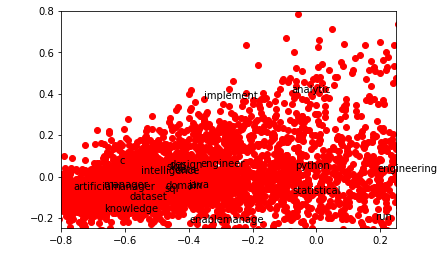

In [31]:
# Transform vectors to 2-dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(W)

pyplot.scatter(result[:, 0], result[:, 1],color = 'red')
words = list(model.wv.vocab)
for i, word in enumerate(taxonomy):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.axis([-.8,.25,-0.25,.8])
pyplot.show()

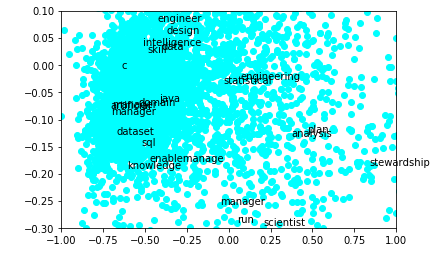

In [30]:
pyplot.scatter(result[:, 0], result[:, 1],color = 'cyan')
words = list(model.wv.vocab)
for i, word in enumerate(taxonomy):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.axis([-1,1,-.3,.1])
pyplot.show()

In [289]:
# x = 0
# for file in filenames:
#     x+=1
#     with open(path + file) as f:
#         text = f.read()
#         test = [line.strip() for line in text.splitlines()]
#         if x == 2:
#             break
        

In [293]:
sentdictionary = dict()
for i in range(len(filenames)):
    with open(path + filenames[i], 'r') as f:
        text = f.read().lower()
        f.close()
        sentdictionary[i] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)
for j in range(len(filenames2)):
    with open(path2 + filenames2[j], 'r') as g:
        text = g.read().lower()
        g.close()
        sentdictionary[j + len(filenames)] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)


## Taxonomy
Individual competencies per competence groups

In [269]:
# Data Science Analytics competence requirements
DSDA  = ['use data analytics', 'statistical techniques', 'discover new relations', 'deliver insights', 'decision making']
DSDA1 = ['techniques', 'machine learning', 'supervised learning', 'unsupervised learning', 'data mining', 'predictive analytics', 'complex data analysis']
DSDA2 = ['quantitative techniques', 'statistics', 'time series analysis', 'optimization']
DSDA3 = ['identify', 'extract', 'heterogeneous data', 'modern data sources', 'administrative data', 'social media data', 'open data']
DSDA4 = ['understand performance metrics', 'use performance metrics', 'model validation', 'testing', 'information retrieval']
DSDA5 = ['develop data analytics', 'organizational tasks', 'integrate data analytics', 'enable agile decisions']
DSDA6 = ['visualization results', 'design dashboard', 'explaining methods']

# DSDA_comp = [DSDA, DSDA1, DSDA2, DSDA3, DSDA4, DSDA5, DSDA6]
DSDA_comp = {0 : DSDA, 1 : DSDA1, 2 : DSDA2, 3 : DSDA3, 4 : DSDA4, 5 : DSDA5, 6 : DSDA6}

In [270]:
# Data Science Engineering competence requirements
DSENG  = ['engineering principles', 'modern computer technologies', 'research', 'design', 'implement data analytics', 'implement applications', 'develop experiments', 'develop processes', 'develop instruments']
DSENG1 = ['engineering principles', 'research', 'design applications', 'design instruments', 'design applications', 'develop instruments', 'implement instruments', 'implement applications', 'data collection', 'data storage']
DSENG2 = ['develop computational solutions', 'apply computational solutions', 'wide range', 'data analytics platforms', 'big data technologies', 'cloud based']
DSENG3 = ['develop data analysis applications', 'develop tools', 'parallel processing', 'cluster processing', 'cloud based solutions', '']
DSENG4 = ['develop data storage', 'deploy data storage', 'operate data storage', 'hadoop', 'cassandra', 'hbase', 'mongodb', 'accumulo' ]
DSENG5 = ['apply security mechanisms', 'apply security controls', 'stage data processing', 'data privacy', 'protection']
DSENG6 = ['develop relational databases', 'non relational databases', 'build relational databases', 'deploy relational databases', 'sql', 'data warehouse', 'etl','large datasets']

# DSENG_comp = [DSENG, DSENG1, DSENG2, DSENG3, DSENG4, DSENG5, DSENG6]
DSENG_comp = {0 : DSENG, 1 : DSENG1, 2 : DSENG2, 3 : DSENG3, 4 : DSENG4, 5 : DSENG5, 6 : DSENG6}

In [299]:
# Data Science Management competence requirements
DSDM  = ['develop data management', 'implement data management', 'strategy data collection', 'strategy data storage', 'strategy data availability']
DSDM1 = ['develop data strategy', 'implement data strategy','data management policy', 'data management plan']
DSDM2 = ['develop relevant data models', 'implement relevant data models', 'define metadata', 'common standards', '']
DSDM3 = ['integrate heterogeneous data', 'provide heterogeneous data', 'provide further analysis']
DSDM4 = ['maintain historical information', 'data handling']
DSDM5 = ['ensure data quality', 'ensure data available', 'ensure data interoperability', 'compliance standards', 'compliance publication']
DSDM6 = ['develop policies', 'manage policies', 'supervise policies', 'data protection policies', 'privacy','ethical issues']
DSDM_comp = {0 : DSDM, 1 : DSDM1, 2 : DSDM2, 3 : DSDM3, 4 : DSDM4, 5 : DSDM5, 6 : DSDM6}

In [313]:
# Research Methods and Project Management competence requirements
DSRM  = ['create new understanding', 'create new capabilities', 'scientific method','discover new approaches','create new knowledge','achieve research goals','achieve organisation goals']
DSRM1 = ['create new understanding', 'using research methods', 'experiment', 'evaluation','training','testing']
DSRM2 = ['direct systematic study','understanding observation facts','discover new approaches','achieve research goals','achieve organisation goals']
DSRM3 = ['analyse domain research model', 'identify data', 'analyse data','identify research questions','identify organisation objectives','formulate sound']
DSRM4 = ['perform creative work', 'systematic investigation', 'systematic experimentation', 'discover knowledge','adjust knowledge','derive new applications', 'contribute development']
DSRM5 = ['design experiments', 'data collection', 'not active collection', 'active collection', 'testing', 'problem solving']
DSRM6 = ['develop data driven projects', 'guide data driven projects', 'project planning', 'experiment design', 'data collection', 'handling']
DSRM_comp = {0 : DSRM, 1 : DSRM1, 2 : DSRM2, 3 : DSRM3, 4 : DSRM4, 5 : DSRM5, 6 : DSRM6}

In [293]:
# Domain related Competences (DSDK): Applied to Business Analytics
DSBA  = ['use domain knowledge', 'develop data analytics applications', 'use data science methods', 'domain specific data types', 'domain specific presentations']
DSBA1 = ['analyse information needs', 'assess existing data', 'propose new data', 'identify new data', 'business context','achieve organisation goal', 'social network source', 'open network sources']
DSBA2 = ['operational concepts', 'enable key performance', 'validate business analysis', 'identify potential challenges', 'assess potential challenges']
DSBA3 = ['business focused analysis', 'bi methods tools', 'identify business impact trends', 'make business case', 'organisation data analysis', 'identified trends']
DSBA4 = ['analyse opportunity', 'propose historical data', 'organisation process optimization']
DSBA5 = ['analyse customer relations', 'optimize data', 'interaction user groups', 'specific business sectors']
DSBA6 = ['analyse multiple data sources', 'marketing purposes', 'identify effective strategy', 'marketing actions']
DSDK_comp = {0 : DSBA, 1 : DSBA1, 2 : DSBA2, 3 : DSBA3, 4 : DSBA4, 5 : DSBA5, 6 : DSBA6}

In [274]:
# word_vectors.most_similar(['.'])

In [309]:
word_vectors.similarity('artificial', 'intelligence')

0.9605808173390791

In [276]:
# word_vectors.doesnt_match('data big machine learning  intelligence artificial'.split())

In [316]:
# This was done to see if there are spellings mistakes in the competence groups

for dictionaryy in dictionaries:
    for key, comp in dictionaryy.items():
        for sent in comp:
            for word in sent.split():
                if word not in word_vectors:
                    print(word)
                    print(key)

In [213]:
s = sum(word_vectors['use', 'data','analytics'])
x = sum(word_vectors['use', 'data','analytics'])
y = sum(word_vectors['use', 'engineering', 'principles'])

# np.atleast_2d(x)
# cosine_similarity(np.atleast_2d(x),np.atleast_2d(y))

In [248]:
# len(sentdictionary)
word_vectors.vocab


{'52': <gensim.models.keyedvectors.Vocab at 0x7f94541a2cf8>,
 'verbeterinitiatieven': <gensim.models.keyedvectors.Vocab at 0x7f945546def0>,
 'improve': <gensim.models.keyedvectors.Vocab at 0x7f94541a2d68>,
 'vertaalt': <gensim.models.keyedvectors.Vocab at 0x7f945546d550>,
 'datavibes': <gensim.models.keyedvectors.Vocab at 0x7f944c63fc18>,
 'nielsen': <gensim.models.keyedvectors.Vocab at 0x7f944c63f2b0>,
 'classified': <gensim.models.keyedvectors.Vocab at 0x7f94541a2e10>,
 'bitbucket': <gensim.models.keyedvectors.Vocab at 0x7f94541924e0>,
 'attach': <gensim.models.keyedvectors.Vocab at 0x7f944c63fb00>,
 'mooi': <gensim.models.keyedvectors.Vocab at 0x7f944c63ffd0>,
 'werktijden': <gensim.models.keyedvectors.Vocab at 0x7f94541a2e48>,
 'independent': <gensim.models.keyedvectors.Vocab at 0x7f944c63f240>,
 'server': <gensim.models.keyedvectors.Vocab at 0x7f944c63f550>,
 'validation': <gensim.models.keyedvectors.Vocab at 0x7f945417fda0>,
 'design/development': <gensim.models.keyedvectors.Voca

In [ ]:
# This will do the classifying when completed
def check_family(dictionary):
    for i in range(len(dictionary)):
        document = dictionary[i]
        for line in document:
            for word in document


In [216]:
# This prints all words in the model that arent just letters

# # word_vectors.most_similar(positive=[''])
# # word_vectors.similarity('experiments', 'experiment')
# x = word_vectors.vocab
# for key in x:
#     if key.isalpha() != True:
#         print(key)
        

In [357]:
print(DSDM[0].split())
for word in DSDM[0].split():
#     print(word)
    x += word_vectors[word]

['develop', 'data', 'management']


In [218]:
# testtext

In [219]:
# testtext = sentdictionary[1]
# testtext[0].split()
# # for line in testtext:
# #     print(line)
# #     print(' ')

## Code
This calculates the results step by step.
First all sentences of a given job post will be transformed into vectors.
Then all the competencies will be transformed into vectors.

Then similarity will be calculated and percentages will be calculated.

In [314]:
dictionaries = [DSDA_comp, DSENG_comp, DSDM_comp, DSRM_comp, DSDK_comp]

In [46]:
# The reason why I dont take full line length, is because not every
# word in the line is in the model.
# This function tranfsorms every sentence of a textfile to a vector that
# represents the meaning of the sentence according to the model u give it

# This returns a dictionary for a certain text where every sentence has
# been transformed to a vector that represents the sentence's meaning.
def sentence_meaning(textNumber, dictionary, model, nfeatures):
    sentence_meanings = []
    vector_dict = dict()
    text = dictionary[textNumber]
    for line in text:
        line_length = 0
        vector = np.zeros(nfeatures, dtype='float32')
        for word in line.split():
            if word in model:
                line_length += 1
                vector += model[word]
        if np.all(vector==0) != True:
            vector = vector / line_length
            sentence_meanings.append(vector)
    vector_dict[textNumber] = sentence_meanings
    return vector_dict
# competence_sim(testtext, word_vectors, 100)


# This function transforms all individual competencies to vector
# representation which contanis the meanings of the individual competencies
# Works very fast even with 3 for-loops
def competence_meaning(comp_group, model, nfeatures):
    competence_dict = {}
    # 6 individual competencies per competence group
    # DSDA, DSDA1, DSDA2 ... etc.
    for key, comp in comp_group.items():
        competence_meanings = []
        comp_length = 0
        # Total of 6 - 10 sentences
        for sentences in comp:
            vector = np.zeros(nfeatures, dtype='float32')
            # 2 or 3 words
            for word in sentences:
                if word in model:
                    comp_length += 1
                    vector += model[word]
            vector = vector / comp_length
            competence_meanings.append(vector)
        competence_dict[key] = competence_meanings
    return competence_dict
    

            

In [47]:
# Calculate similarties per comp group per text
def competence_similarity(text, model, nfeatures):
    sentences = sentence_meaning(textNumber, dictionary, model, nfeatures)
    competencies = competence_meaning(comp_group, model, nfeatures)
    

In [324]:
# Test sentence_meaning():
sentence_vectors = [sentence_meaning(num, sentdictionary, word_vectors, 100) for num in range(len(filenames))]

# Individual competencies meanings:
competence_vectors = [competence_meaning(dictionary_comp, word_vectors, 100) for dictionary_comp in dictionaries]

In [369]:
x = sentence_vectors[0]

len(x[0])


# first = sentence_vectors[5]
# print(coun)

52

In [350]:
# for key,value in first.items():
#     print(value)
# #     print('hi')

In [346]:
coun = 0
for key, value in first.items():
    coun += 1

In [272]:
def check_occ(word):
    if word in model.wv.vocab:
        return 1
    else:
        return 0

In [37]:
vesctor = np.zeros(100, dtype='float32')
np.all(vesctor!=0)

False

In [439]:
DSDA_vectors = competence_meaning(DSDA_comp, word_vectors, 100)
DSENG_vectors = competence_meaning(DSENG_comp, word_vectors, 100)

In [447]:
print(len(DSDA_vectors[0]))
print(len(DSENG_vectors[0]))
print(len(DSENG))

5
9
9


In [232]:
for d in DSDA_comp.values():
#     print(d)
    for s in d:
        print(s.split())
    break

['use', 'data', 'analytics']
['statistical', 'techniques']
['discover', 'new', 'relations']
['deliver', 'insights']
['decision', 'making']


In [ ]:
DSDA1 = ['techniques', 'machine learning', 'supervised learning', 'unsupervised learning', 'data mining', 'prescriptive analytics', 'predictive analytics', 'complex data analysis']


In [399]:
for g in DSDA_comp:
    for f in g:
        print(f)
        
    print(' ')

use data analytics
statistical techniques
discover new relations
deliver insights
decision making
 
techniques
machine learning
supervised learning
unsupervised learning
data mining
prescriptive analytics
predictive analytics
complex data analysis
 
quantitative techniques
statistics
time series analysis
optimization
 
identify
extract
heterogeneous data
modern data sources
governmental data
social media data
open data
 
understand performance metrics
use performance metrics
model validation
hypothesis testing
information retrieval
 
develop data analytics
organizational tasks
integrate data analytics
enable agile decisions
 
visualization results
design dashboard
explaining methods
 


In [166]:
for words in dsda:
#     print(words)
#     print(words.split())
    word_vectors.most_similar(words.split())
#     break